#Task5: Heart Disease Prediction

## Importing the dataset from Kaggle


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d johnsmith88/heart-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
License(s): unknown
  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 16.4MB/s]


In [ ]:
!unzip heart-disease-dataset.zip

Archive:  heart-disease-dataset.zip
  inflating: heart.csv               


## Loading the dataset

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('heart.csv')

# Display the first few rows
display(df.head())

# Display information about the DataFrame
display(df.info())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


None

## Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Check for missing values
print("Missing values before handling:")
display(df.isnull().sum())

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Identify categorical and numerical features
# Based on the dataset description and info, sex, cp, fbs, restecg, exang, slope, ca, and thal appear to be categorical
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create a column transformer for one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create the preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply preprocessing to the features
X_processed = pipeline.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("\nShape of processed data:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Missing values before handling:


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0



Shape of processed data:
X_train shape: (820, 30)
X_test shape: (205, 30)
y_train shape: (820,)
y_test shape: (205,)


## Training a Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully.")

Decision Tree Classifier trained successfully.


## Visualizing the Decision Tree


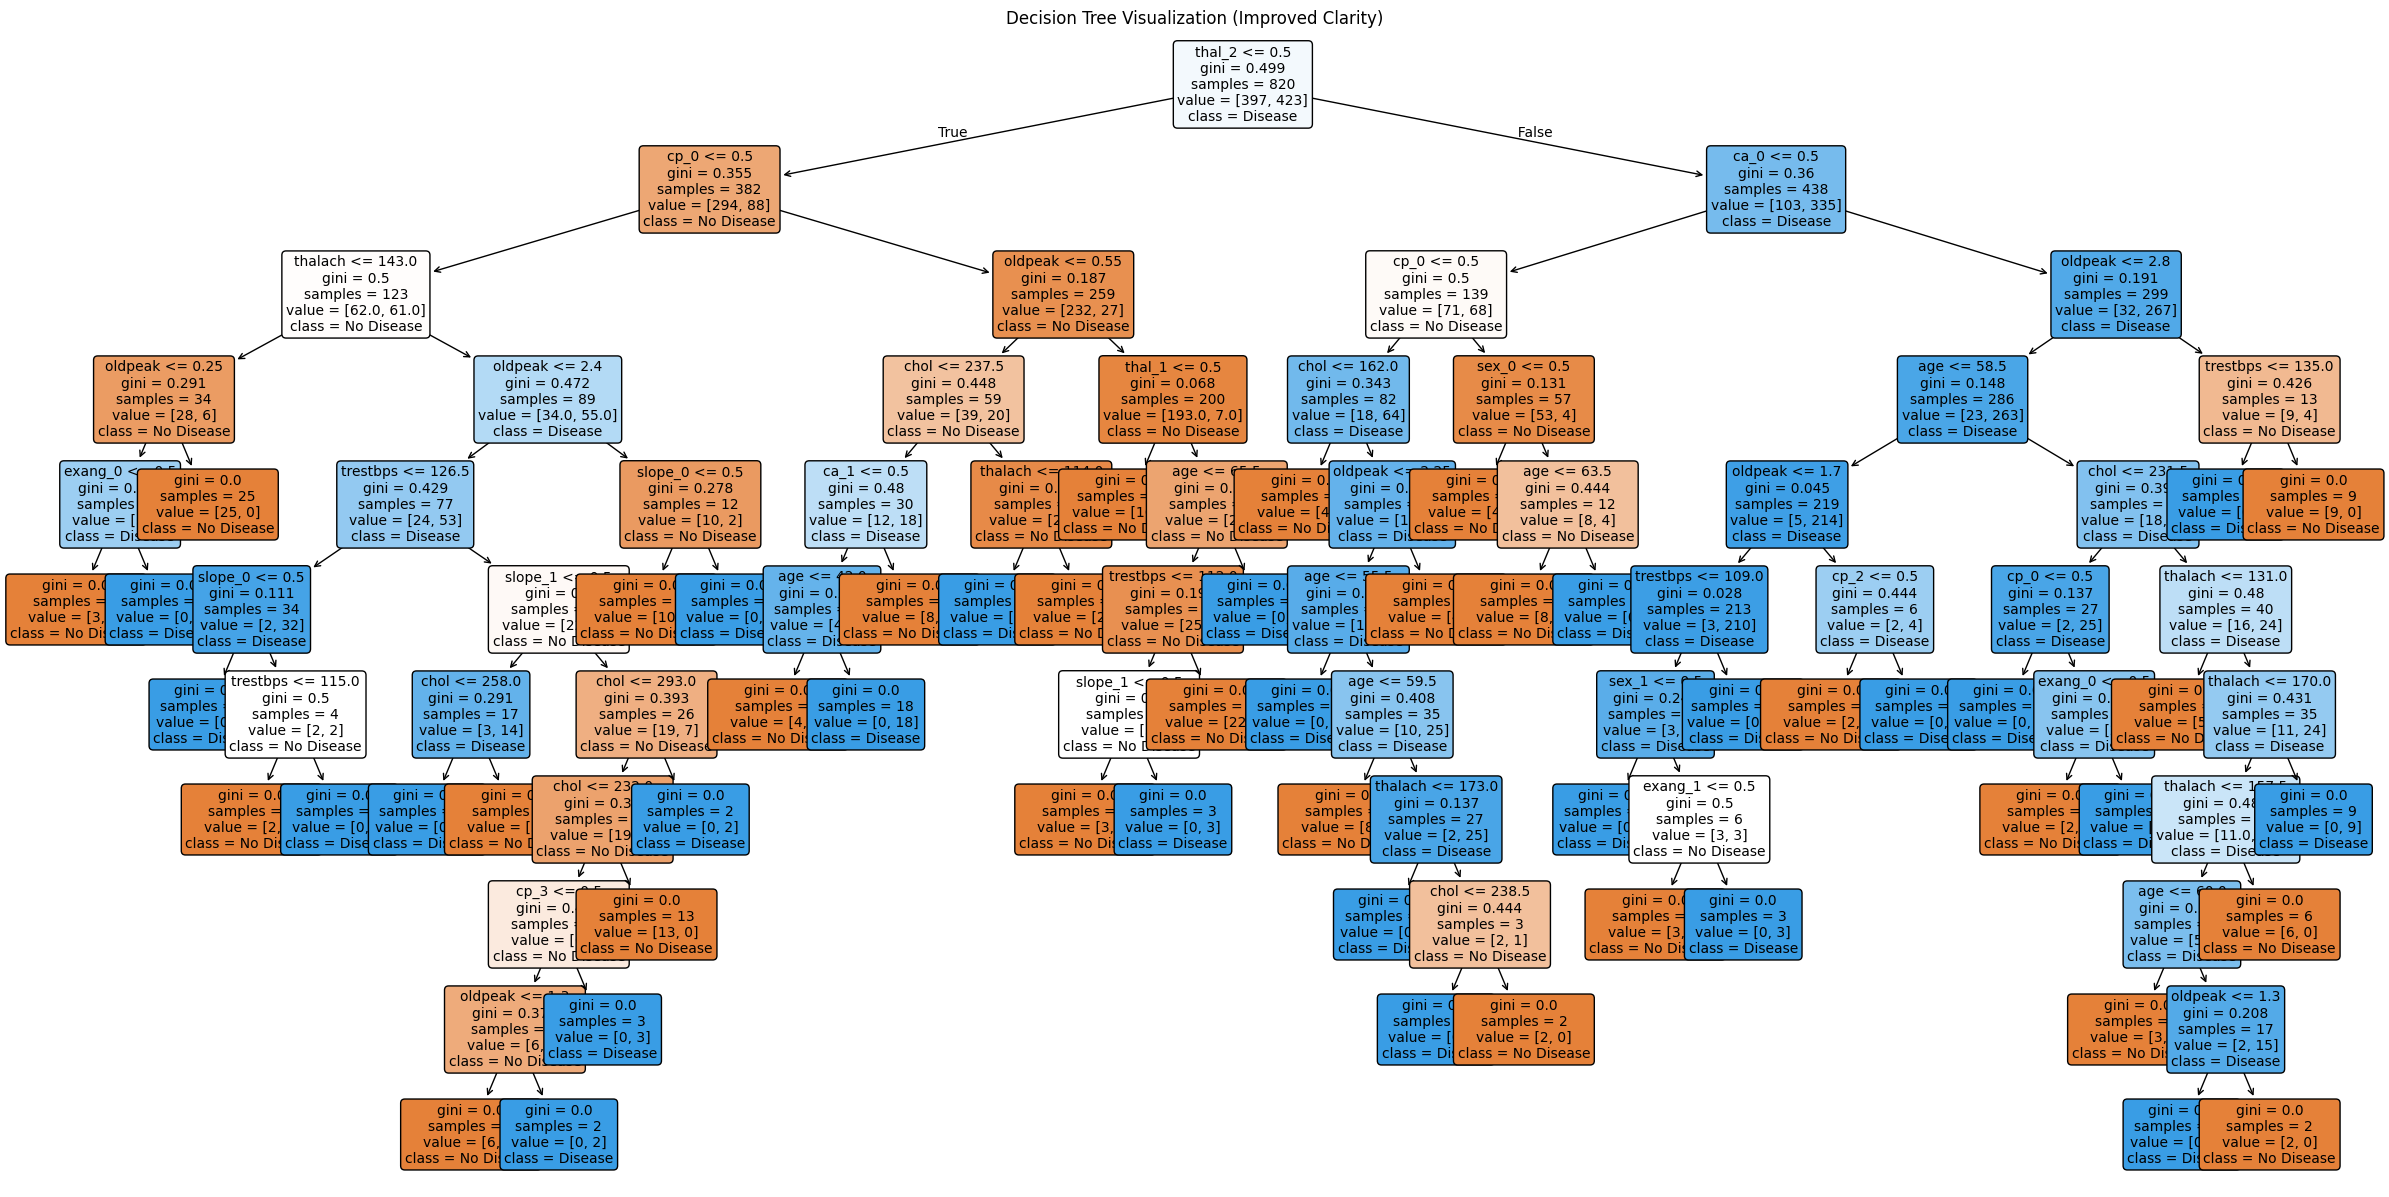

Decision tree visualization with improved clarity generated using matplotlib.


In [ ]:

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Get feature names after one-hot encoding
# This can be a bit tricky with ColumnTransformer, but we can get the names
# by inspecting the one-hot encoder categories and combining with numerical feature names.
ohe_categories = pipeline.named_steps['preprocessor'].named_transformers_['cat'].categories_
flat_ohe_categories = [item for sublist in ohe_categories for item in sublist]
feature_names = numerical_features + [f"{col}_{cat}" for col, cats in zip(categorical_features, ohe_categories) for cat in cats]


# Visualize the decision tree using plot_tree with improved clarity
plt.figure(figsize=(30, 15)) # Increase figure size for better visibility
plot_tree(dt_classifier,
          feature_names=feature_names, # Include feature names
          class_names=['No Disease', 'Disease'], # Include class names
          filled=True, # Color nodes to indicate majority class
          rounded=True, # Use rounded node boxes
          fontsize=10) # Increase font size
plt.title("Decision Tree Visualization (Improved Clarity)") # Updated title
plt.show()

print("Decision tree visualization with improved clarity generated using matplotlib.")

## Analyzing Overfitting and Control Tree Depth



In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate the initial Decision Tree
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Initial Decision Tree Training Accuracy: {train_accuracy:.4f}")
print(f"Initial Decision Tree Testing Accuracy: {test_accuracy:.4f}")

# Experiment with different max_depth values
max_depths = [2, 3, 5, 10, 15]
train_accuracies = []
test_accuracies = []

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)

    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"\nDecision Tree with max_depth={depth}")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}")

# Optional: Visualize the impact of max_depth (requires matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(max_depths, test_accuracies, marker='o', label='Testing Accuracy')
plt.set_xticks(max_depths)
plt.title('Impact of max_depth on Decision Tree Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Initial Decision Tree Training Accuracy: 1.0000
Initial Decision Tree Testing Accuracy: 0.9854

Decision Tree with max_depth=2
Training Accuracy: 0.7707
Testing Accuracy: 0.7268

Decision Tree with max_depth=3
Training Accuracy: 0.8585
Testing Accuracy: 0.8146

Decision Tree with max_depth=5
Training Accuracy: 0.9232
Testing Accuracy: 0.8341

Decision Tree with max_depth=10
Training Accuracy: 1.0000
Testing Accuracy: 0.9854

Decision Tree with max_depth=15
Training Accuracy: 1.0000
Testing Accuracy: 0.9854


## Training a Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.


## Comparing Accuracy


In [ ]:
from sklearn.metrics import accuracy_score

# Predict on the test data
y_test_pred_dt = dt_classifier.predict(X_test)
y_test_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Decision Tree Classifier Test Accuracy: {accuracy_dt:.4f}")
print(f"Random Forest Classifier Test Accuracy: {accuracy_rf:.4f}")

Decision Tree Classifier Test Accuracy: 0.9854
Random Forest Classifier Test Accuracy: 0.9854


## Interpreting Feature Importances


In [ ]:
import pandas as pd

# Get feature importances from the Random Forest model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print("\nFeature Importances from Random Forest:")
display(feature_importance_df)


Feature Importances from Random Forest:


,feature,importance
7,cp_0,0.098913
4,oldpeak,0.095042
3,thalach,0.092834
21,ca_0,0.083042
28,thal_2,0.082802
29,thal_3,0.075372
2,chol,0.069331
0,age,0.067210
1,trestbps,0.057468
17,exang_1,0.032748


## Evaluating using Cross-Validation


In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluate Decision Tree using cross-validation
cv_scores_dt = cross_val_score(dt_classifier, X_processed, y, cv=5) # Using 5 folds

print("\nDecision Tree Cross-Validation Accuracy Scores:", cv_scores_dt)
print(f"Decision Tree Mean Cross-Validation Accuracy: {cv_scores_dt.mean():.4f}")

# Evaluate Random Forest using cross-validation
cv_scores_rf = cross_val_score(rf_classifier, X_processed, y, cv=5) # Using 5 folds

print("\nRandom Forest Cross-Validation Accuracy Scores:", cv_scores_rf)
print(f"Random Forest Mean Cross-Validation Accuracy: {cv_scores_rf.mean():.4f}")


Decision Tree Cross-Validation Accuracy Scores: [1.         0.98536585 0.98536585 1.         0.98536585]
Decision Tree Mean Cross-Validation Accuracy: 0.9912

Random Forest Cross-Validation Accuracy Scores: [1.         1.         1.         1.         0.98536585]
Random Forest Mean Cross-Validation Accuracy: 0.9971


## Conclusion

Based on the analysis:

*   **Model Performance:** Both the Decision Tree and Random Forest classifiers achieved very high accuracy on the test set (0.9854). The cross-validation scores also indicate robust performance for both models, with the Random Forest showing a slightly higher mean cross-validation accuracy (0.9971) compared to the Decision Tree (0.9912). This suggests that the models are performing well and generalizing to unseen data.
*   **Overfitting Analysis:** The initial Decision Tree with no `max_depth` limit showed perfect training accuracy (1.0000), indicating potential overfitting. Experimenting with different `max_depth` values revealed that limiting the depth can help control overfitting while still maintaining good performance on the test set. Depths of 10 and 15 also resulted in perfect training accuracy and high test accuracy in this specific run.
*   **Feature Importance:** The Random Forest model provided insights into feature importance. The top features contributing to the prediction of heart disease appear to be `cp_0` (a category within chest pain type), `oldpeak` (ST depression induced by exercise relative to rest), `thalach` (maximum heart rate achieved), `ca_0` (number of major vessels colored by fluoroscopy), and `thal_2` and `thal_3` (categories within thalassemia).
*   **Data Preprocessing:** One-hot encoding was applied to categorical features, which is a standard practice for preparing categorical data for many machine learning models.
*   **Cross-Validation:** Using cross-validation provided a more reliable estimate of the models' performance by evaluating them on different subsets of the data.

In conclusion, both the Decision Tree and Random Forest models demonstrated strong performance on this heart disease dataset. The Random Forest, with its ensemble approach, showed slightly better cross-validation performance. The feature importance analysis from the Random Forest provides valuable insights into which factors are most influential in predicting heart disease based on this dataset. Further steps could involve hyperparameter tuning for both models to potentially improve performance further, exploring other classification algorithms, or investigating the relationships between the most important features and heart disease.